In [ ]:
# Install the Hugging Face libraries
!pip install transformers datasets


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 13.9 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [ ]:
from datasets import load_dataset

# Load the CoNLL-2003 dataset
dataset = load_dataset('conll2003')

# Print dataset structure
print(dataset)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/12.3k [00:00<?, ?B/s]

conll2003.py:   0%|          | 0.00/9.57k [00:00<?, ?B/s]

The repository for conll2003 contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/conll2003.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


Generating train split:   0%|          | 0/14041 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/3250 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/3453 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['id', 'tokens', 'pos_tags', 'chunk_tags', 'ner_tags'],
        num_rows: 14041
    })
    validation: Dataset({
        features: ['id', 'tokens', 'pos_tags', 'chunk_tags', 'ner_tags'],
        num_rows: 3250
    })
    test: Dataset({
        features: ['id', 'tokens', 'pos_tags', 'chunk_tags', 'ner_tags'],
        num_rows: 3453
    })
})


In [ ]:
# Display one sample from the training dataset
print(dataset['train'][0])

# Check the dataset features
print(dataset['train'].features)


{'id': '0', 'tokens': ['EU', 'rejects', 'German', 'call', 'to', 'boycott', 'British', 'lamb', '.'], 'pos_tags': [22, 42, 16, 21, 35, 37, 16, 21, 7], 'chunk_tags': [11, 21, 11, 12, 21, 22, 11, 12, 0], 'ner_tags': [3, 0, 7, 0, 0, 0, 7, 0, 0]}
{'id': Value(dtype='string', id=None), 'tokens': Sequence(feature=Value(dtype='string', id=None), length=-1, id=None), 'pos_tags': Sequence(feature=ClassLabel(names=['"', "''", '#', '$', '(', ')', ',', '.', ':', '``', 'CC', 'CD', 'DT', 'EX', 'FW', 'IN', 'JJ', 'JJR', 'JJS', 'LS', 'MD', 'NN', 'NNP', 'NNPS', 'NNS', 'NN|SYM', 'PDT', 'POS', 'PRP', 'PRP$', 'RB', 'RBR', 'RBS', 'RP', 'SYM', 'TO', 'UH', 'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ', 'WDT', 'WP', 'WP$', 'WRB'], id=None), length=-1, id=None), 'chunk_tags': Sequence(feature=ClassLabel(names=['O', 'B-ADJP', 'I-ADJP', 'B-ADVP', 'I-ADVP', 'B-CONJP', 'I-CONJP', 'B-INTJ', 'I-INTJ', 'B-LST', 'I-LST', 'B-NP', 'I-NP', 'B-PP', 'I-PP', 'B-PRT', 'I-PRT', 'B-SBAR', 'I-SBAR', 'B-UCP', 'I-UCP', 'B-VP', 'I-VP'], id

In [ ]:
from transformers import AutoModelForTokenClassification, AutoTokenizer

# Model name
model_name = "dbmdz/bert-large-cased-finetuned-conll03-english"

# Load the model and tokenizer
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForTokenClassification.from_pretrained(model_name)

print(f"Model {model_name} loaded successfully!")


The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

tokenizer_config.json:   0%|          | 0.00/60.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/998 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Model dbmdz/bert-large-cased-finetuned-conll03-english loaded successfully!


In [ ]:
from transformers import pipeline

# Create the NER pipeline
ner_pipeline = pipeline("ner", model=model, tokenizer=tokenizer, aggregation_strategy="simple")

# Test the pipeline with sample text
sample_text = """
John Doe is a software engineer with expertise in Python and Machine Learning.
He graduated from Stanford University in 2018 and worked at Google as a Data Scientist from 2019 to 2021.
"""

# Get NER predictions
results = ner_pipeline(sample_text)

# Display the results
for entity in results:
    print(f"Entity: {entity['entity_group']}, Text: {entity['word']}, Score: {entity['score']:.2f}")


Entity: PER, Text: John Doe, Score: 1.00
Entity: MISC, Text: Python, Score: 0.98
Entity: MISC, Text: Machine Learning, Score: 0.96
Entity: ORG, Text: Stanford University, Score: 0.99
Entity: ORG, Text: Google, Score: 1.00


In [ ]:
# Load the test split of the dataset
test_dataset = dataset['test']

# Display a sample from the test dataset
print(test_dataset[0])


{'id': '0', 'tokens': ['SOCCER', '-', 'JAPAN', 'GET', 'LUCKY', 'WIN', ',', 'CHINA', 'IN', 'SURPRISE', 'DEFEAT', '.'], 'pos_tags': [21, 8, 22, 37, 22, 22, 6, 22, 15, 12, 21, 7], 'chunk_tags': [11, 0, 11, 21, 11, 12, 0, 11, 13, 11, 12, 0], 'ner_tags': [0, 0, 5, 0, 0, 0, 0, 1, 0, 0, 0, 0]}


In [ ]:
# Function to convert tokenized sentences to text
def tokens_to_text(tokens):
    return " ".join(tokens)

# Prepare test sentences
test_sentences = [tokens_to_text(sample['tokens']) for sample in test_dataset]

# Prepare true labels
true_labels = test_dataset['ner_tags']
label_list = dataset['train'].features['ner_tags'].feature.names


In [ ]:
!pip install tqdm


In [ ]:
from tqdm import tqdm

# Get predictions for the test set with progress bar
predictions = []
for sentence in tqdm(test_sentences, desc="Processing Sentences"):
    pred = ner_pipeline(sentence)
    predictions.append(pred)


Processing Sentences: 100%|██████████| 3453/3453 [25:13<00:00,  2.28it/s]


In [ ]:
# Function to align predictions with token-level tags
def align_predictions(predictions, tokens):
    # Initialize token-level tags as 'O' (non-entity)
    pred_tags = ['O'] * len(tokens)

    for entity in predictions:
        # Match tokens with entity start and end character indices
        entity_word = entity['word'].replace("##", "")  # Handle subword tokens
        for idx, token in enumerate(tokens):
            # Check if the entity word is contained in the token
            if entity_word in token:
                pred_tags[idx] = entity['entity_group']  # Assign the entity group
                break  # Move to the next entity
    return pred_tags

# Align predictions with test set tokens
aligned_predictions = [
    align_predictions(pred, sample['tokens'])
    for pred, sample in zip(predictions, test_dataset)
]


In [ ]:
# Flatten true labels and map to their string names
label_list = dataset['train'].features['ner_tags'].feature.names
true_labels_flat = [label_list[label] for sample in test_dataset['ner_tags'] for label in sample]

# Flatten predictions
predictions_flat = [tag for sample in aligned_predictions for tag in sample]


In [ ]:
from sklearn.metrics import classification_report

# Generate evaluation metrics
report = classification_report(true_labels_flat, predictions_flat, zero_division=0)
print(report)


              precision    recall  f1-score   support

       B-LOC       0.00      0.00      0.00      1668
      B-MISC       0.00      0.00      0.00       702
       B-ORG       0.00      0.00      0.00      1661
       B-PER       0.00      0.00      0.00      1617
       I-LOC       0.00      0.00      0.00       257
      I-MISC       0.00      0.00      0.00       216
       I-ORG       0.00      0.00      0.00       835
       I-PER       0.00      0.00      0.00      1156
         LOC       0.00      0.00      0.00         0
        MISC       0.00      0.00      0.00         0
           O       0.89      1.00      0.94     38323
         ORG       0.00      0.00      0.00         0
         PER       0.00      0.00      0.00         0

    accuracy                           0.82     46435
   macro avg       0.07      0.08      0.07     46435
weighted avg       0.74      0.82      0.78     46435



In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [ ]:
# Function to map Hugging Face entity groups to CoNLL-2003 format
def map_entity_group_to_conll(entity_group):
    if entity_group == "O":
        return "O"  # Non-entity remains "O"
    elif entity_group in ["PER", "ORG", "LOC", "MISC"]:
        return f"B-{entity_group}"  # Map to beginning tag
    else:
        return "O"  # Default to "O" for any unknown groups

# Map predictions to CoNLL-2003 labels
predictions_flat_mapped = [
    map_entity_group_to_conll(label) for label in predictions_flat
]

# Convert true and predicted labels to indices
true_labels_indices = [label_to_index[label] for label in true_labels_flat]
predicted_labels_indices = [label_to_index[label] for label in predictions_flat_mapped]

# Compute confusion matrix
cm = confusion_matrix(true_labels_indices, predicted_labels_indices, labels=range(len(label_list)))


In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Compute confusion matrix
cm = confusion_matrix(true_labels_indices, predicted_labels_indices, labels=range(len(label_list)))

# Print confusion matrix as a raw array
print("Confusion Matrix (Raw Values):")
print(cm)


Confusion Matrix (Raw Values):
[[38172    16     0    44     0    19     0    72     0]
 [ 1112   464     0    23     0    14     0     4     0]
 [ 1142     7     0     4     0     2     0     1     0]
 [  624     8     0   978     0    37     0    14     0]
 [  819     0     0     9     0     5     0     2     0]
 [  290     4     0    38     0  1317     0    19     0]
 [  250     0     0     1     0     6     0     0     0]
 [  200     5     0    29     0    28     0   440     0]
 [  208     0     0     1     0     2     0     5     0]]


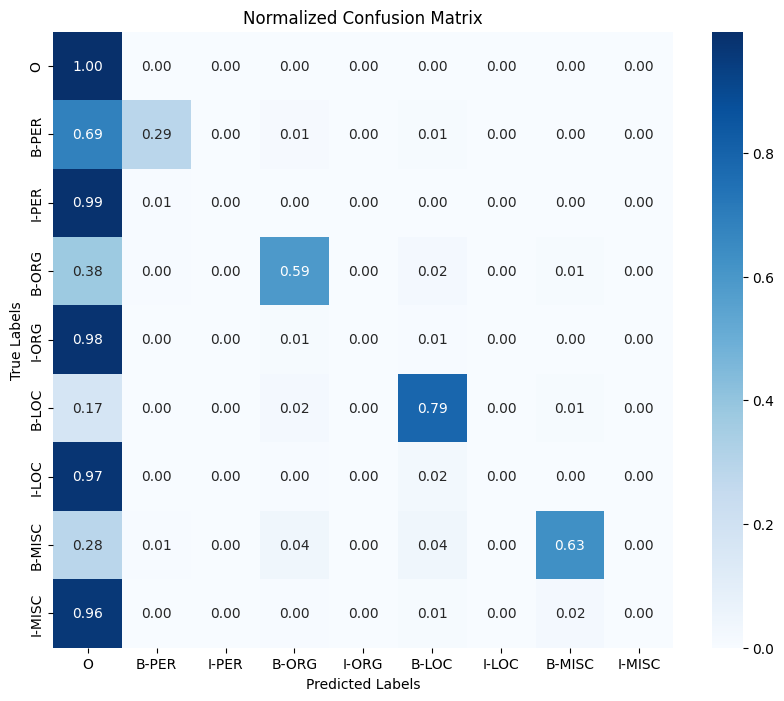

In [ ]:
# Normalize the confusion matrix for better interpretability
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap="Blues", xticklabels=label_list, yticklabels=label_list)
plt.title("Normalized Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


In [ ]:
!pip install pdfplumber


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.0/42.0 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.5/48.5 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 51.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 47.4 MB/s eta 0:00:00


In [ ]:
import pdfplumber

# Specify the PDF resume file path
resume_pdf_path = "/content/sample_data/Ravindranadh_AI_Engineer_Updated.pdf"  # Replace with your actual PDF file path

# Extract text from the PDF
with pdfplumber.open(resume_pdf_path) as pdf:
    resume_text = ""
    for page in pdf.pages:
        resume_text += page.extract_text()

# Check if text extraction was successful
if not resume_text.strip():
    print("Error: Could not extract text from the PDF. Please check the file!")
else:
    # Run the NER pipeline on the extracted text
    print("\nProcessing the resume for entity extraction...")
    resume_predictions = ner_pipeline(resume_text)

    # Organize and print the extracted content
    def extract_entities(predictions, entity_type):
        return [entity['word'] for entity in predictions if entity['entity_group'] == entity_type]

    person_names = extract_entities(resume_predictions, "PER")
    organizations = extract_entities(resume_predictions, "ORG")
    skills = extract_entities(resume_predictions, "MISC")
    dates = extract_entities(resume_predictions, "DATE")

    print("\nExtracted Information:")
    print(f"Person Names: {person_names}")
    print(f"Organizations: {organizations}")
    print(f"Skills: {skills}")
    print(f"Dates: {dates}")



Processing the resume for entity extraction...

Extracted Information:
Person Names: []
Organizations: ['RAVINDRANADH', '##L', 'MLO', '##Engineer', '##geAI', 'MachineLearningEngineer']
Skills: ['AI', '##ford']
Dates: []


In [ ]:
from collections import Counter

# Get the distribution of labels in the dataset
label_counts = Counter([label for labels in true_labels_flat for label in labels])
print("Label Distribution:", label_counts)


Label Distribution: Counter({'O': 42744, '-': 8112, 'B': 5648, 'R': 5269, 'I': 3382, 'C': 2843, 'P': 2773, 'E': 2773, 'G': 2496, 'L': 1925, 'M': 918, 'S': 918})


In [ ]:
unique_labels = set(true_labels_flat)
print("Unique Labels in Dataset:", unique_labels)


Unique Labels in Dataset: {'I-LOC', 'B-ORG', 'I-ORG', 'B-PER', 'B-LOC', 'I-PER', 'I-MISC', 'O', 'B-MISC'}


In [ ]:
# Tokenize the dataset and align labels
def tokenize_and_align_labels(examples):
    tokenized_inputs = tokenizer(examples["tokens"], truncation=True, is_split_into_words=True)

    labels = []
    for i, label in enumerate(examples["ner_tags"]):
        word_ids = tokenized_inputs.word_ids(batch_index=i)  # Map tokens to word IDs
        previous_word_idx = None
        label_ids = []
        for word_idx in word_ids:
            if word_idx is None:
                label_ids.append(-100)  # Ignore special tokens
            elif word_idx != previous_word_idx:
                label_ids.append(label[word_idx])  # Use the first label of the word
            else:
                label_ids.append(-100)  # Ignore subword tokens
            previous_word_idx = word_idx
        labels.append(label_ids)

    tokenized_inputs["labels"] = labels
    return tokenized_inputs

# Apply the function to your dataset
tokenized_dataset = dataset.map(tokenize_and_align_labels, batched=True)


Map:   0%|          | 0/14041 [00:00<?, ? examples/s]

Map:   0%|          | 0/3250 [00:00<?, ? examples/s]

Map:   0%|          | 0/3453 [00:00<?, ? examples/s]

In [ ]:
print(tokenized_dataset['train'][0])


{'id': '0', 'tokens': ['EU', 'rejects', 'German', 'call', 'to', 'boycott', 'British', 'lamb', '.'], 'pos_tags': [22, 42, 16, 21, 35, 37, 16, 21, 7], 'chunk_tags': [11, 21, 11, 12, 21, 22, 11, 12, 0], 'ner_tags': [3, 0, 7, 0, 0, 0, 7, 0, 0], 'input_ids': [101, 7270, 22961, 1528, 1840, 1106, 21423, 1418, 2495, 12913, 119, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 'labels': [-100, 3, 0, 7, 0, 0, 0, 7, 0, -100, 0, -100]}


In [ ]:
from transformers import AutoModelForTokenClassification, TrainingArguments, Trainer

# Load the model with the correct number of labels
model = AutoModelForTokenClassification.from_pretrained(
    "dbmdz/bert-large-cased-finetuned-conll03-english",
    num_labels=len(label_list)
)

# Define training arguments
training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir="./logs",
    logging_steps=10,
    save_steps=100,
)

# Define the Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_dataset["train"],
    eval_dataset=tokenized_dataset["validation"],
    tokenizer=tokenizer
)

# Train the model
trainer.train()


Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-28-b1cad7bcd465>:23: FutureWarning: `tokenizer` is deprecated and w

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:wandb: ERROR API key must be 40 characters long, yours was 37


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:wandb: ERROR API key must be 40 characters long, yours was 37


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: